# 1. Importing necessary modules

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 2. Reading data

In [9]:
data = pd.read_csv('Demographic_Data.csv')

# 3. Exploring data

Displaying first five rows of data

In [10]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


Displaying statistical values of the dataset

In [11]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [14]:
data = data.drop_duplicates()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


21 duplicates were removed from the dataset

In [15]:
data.nunique()

in-store        2
age            68
items           8
amount      56112
region          4
dtype: int64

In [13]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


Dataset do not contain missing values

# 4. Features extraction

Age rounded to nearest tenth

In [143]:
data['age_round'] = (data['age']/10).round()*10

Amount spend per item

In [144]:
data['amount_per_item'] = data['amount']/data['items']

# 5. Data visualization

## Simple visualization of data

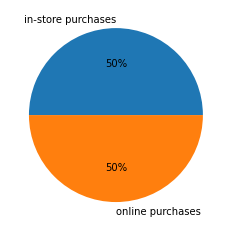

In [43]:
labels = ["in-store purchases", "online purchases"]

plt.pie([data[data['in-store']==1]['in-store'].count(), data[data['in-store']==0]['in-store'].count()], labels=labels, autopct='%1.0f%%')
plt.show()

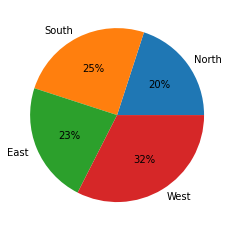

In [44]:
labels = ["North", "South", "East", "West"]

plt.pie([data[data['region']==1]['region'].count(), data[data['region']==2]['region'].count(), data[data['region']==3]['region'].count(), data[data['region']==4]['region'].count()], labels=labels, autopct='%1.0f%%')
plt.show()

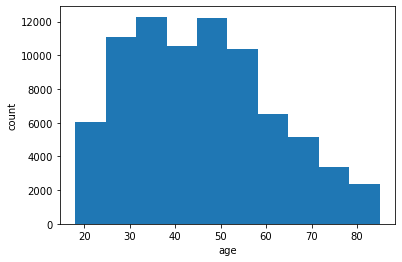

In [40]:
plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Age data histogram is Positively (Right) Skewed. 

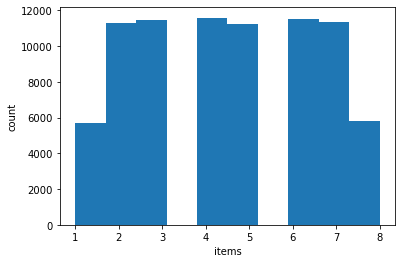

In [42]:
plt.hist(data['items'])
plt.xlabel('items')
plt.ylabel('count')
plt.show()

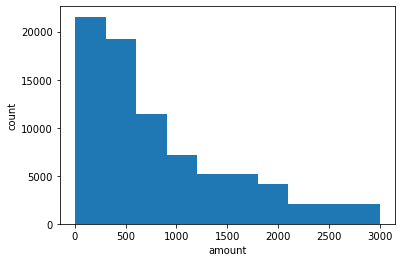

In [45]:
plt.hist(data['amount'])
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

## Do customers in different regions spend more per transaction? Which regions spend the most/least?

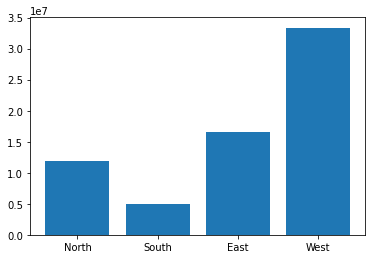

In [51]:
plt.bar(labels,data['amount'].groupby(data['region']).sum())
plt.show()

### The bar plot shows that customers from West spend the most per transaction and customers from South spend the least per transaction

## Is there a relationship between the number of items purchased and amount spent?

In [55]:
data.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


## Checking dependency between amount and items purchased online and in-store

<BarContainer object of 2 artists>

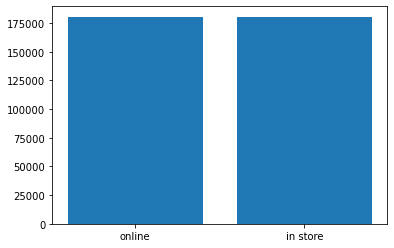

In [131]:
plt.bar(['online', 'in store'],data['items'].groupby(data['in-store']).sum())

<BarContainer object of 2 artists>

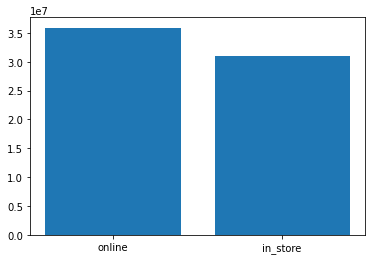

In [136]:
plt.bar(['online', 'in_store'],data['amount'].groupby(data['in-store']).sum())

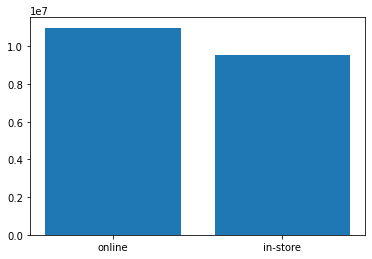

In [140]:
plt.bar(['online', 'in-store'],data['amount_per_item'].groupby(data['in-store']).sum())
plt.show()

### Total number of items purchased online is same as total number of items purchased online, but customers spend more money during online shoping, because they choose more expensive products than in in-store shopping.

## Checking dependency between age and items, amount and amount per item

<BarContainer object of 7 artists>

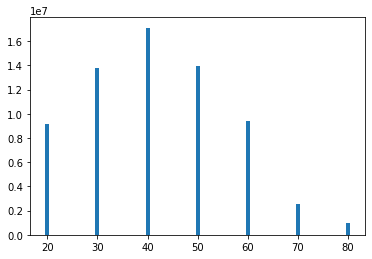

In [137]:
plt.bar(data['amount'].groupby(data['age_round']).sum().index, data['amount'].groupby(data['age_round']).sum().values)

<BarContainer object of 7 artists>

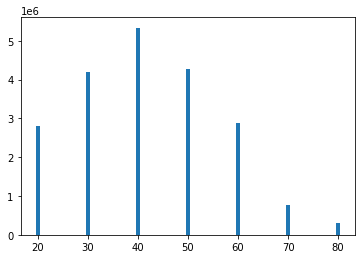

In [141]:
plt.bar(data['amount_per_item'].groupby(data['age_round']).sum().index, data['amount_per_item'].groupby(data['age_round']).sum().values)

<BarContainer object of 7 artists>

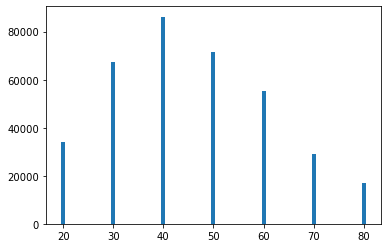

In [142]:
plt.bar(data['items'].groupby(data['age_round']).sum().index, data['items'].groupby(data['age_round']).sum().values)

### The bar plots shows that distribution beetween three selected dependencies does not change.